# Belastingen uit RWS

#  importeer de benodigde functies

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from toolbox_continu_inzicht import Config

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_rws_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "tests/src/loads/data_sets" 
    moments: [-24,0,24,48]  

    LoadsWaterwebservicesRWS:
        parameters:  ['WATHTE']

DataAdapter: 
    default_options:
        csv:
            delimiter: ","
    BelastingLocaties: 
        type: csv
        path: "test_loads_rws_8420.csv"
    Waterstanden: 
        type: csv
        path: "hidden_waterstanden.csv"
...

```

In [2]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_rws_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [3]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [4]:
from toolbox_continu_inzicht.loads import LoadsWaterwebservicesRWS

RWS_webservice = LoadsWaterwebservicesRWS(data_adapter=data)

In [5]:
RWS_webservice.df_in

In [6]:
lst_data = await RWS_webservice.run(input="BelastingLocaties", output="Waterstanden")

In [7]:
RWS_webservice.df_in

,index,measurement_location_id
0,0,9889
1,1,8420
2,2,8411
3,2,8536


In [8]:
df_out = RWS_webservice.df_out.copy()

In [9]:
from toolbox_continu_inzicht.loads.loads_rws_webservice.get_rws_webservices_locations import (
    get_rws_webservices_locations,
)

df_loc = await get_rws_webservices_locations()

In [10]:
df_loc.columns

Index(['Coordinatenstelsel', 'X', 'Y', 'Naam', 'Code'], dtype='object')

In [41]:
df_loc

,Coordinatenstelsel,X,Y,Naam,Code
Locatie_MessageID,,,,,
9405,25831,650558.187857,5.821886e+06,Markermeer midden (zwaartepunt Markermeer),MARKMMDN
9889,25831,662953.888711,5.730335e+06,Hintham beneden,HHMO
9928,25831,705788.247439,5.671745e+06,Linne beneden,LINN
9943,25831,709204.680145,5.838074e+06,Meppelerdiep km 2.5,MEP25
9959,25831,711556.219876,5.803628e+06,Olst,OLST
...,...,...,...,...,...
8420,25831,667699.101552,5.742684e+06,Lith Dorp,LITO
8349,25831,715193.379434,5.843888e+06,Galgenkampsbrug,GALG
8411,25831,682542.589561,5.858128e+06,Lemmer,LEMM


In [42]:
df_out

,measurement_location_id,measurement_location_code,measurement_location_description,parameter_id,parameter_code,datetime,unit,value,value_type
0,9889,HHMO,Hintham beneden,4724,WATHTE,2024-10-28 16:00:00+01:00,cm,201.0,meting
1,9889,HHMO,Hintham beneden,4724,WATHTE,2024-10-28 16:10:00+01:00,cm,200.0,meting
2,9889,HHMO,Hintham beneden,4724,WATHTE,2024-10-28 16:20:00+01:00,cm,200.0,meting
3,9889,HHMO,Hintham beneden,4724,WATHTE,2024-10-28 16:30:00+01:00,cm,203.0,meting
4,9889,HHMO,Hintham beneden,4724,WATHTE,2024-10-28 16:40:00+01:00,cm,200.0,meting
...,...,...,...,...,...,...,...,...,...
1158,8411,LEMM,Lemmer,4724,WATHTEVERWACHT,2024-10-31 11:20:00+01:00,cm,-31.0,verwachting
1159,8411,LEMM,Lemmer,4724,WATHTEVERWACHT,2024-10-31 11:30:00+01:00,cm,-31.0,verwachting
1160,8411,LEMM,Lemmer,4724,WATHTEVERWACHT,2024-10-31 11:40:00+01:00,cm,-31.0,verwachting
1161,8411,LEMM,Lemmer,4724,WATHTEVERWACHT,2024-10-31 11:50:00+01:00,cm,-31.0,verwachting


In [24]:
# split de dataframe in tweeën & process
values_nan = df_out[df_out["value"] == -999].index
for val in values_nan:
    df_out.loc[val, "value"] = np.nan
df_out.sort_index()
df_plot = df_out.set_index(df_out["datetime"])
df_plot = df_plot[df_plot["measurement_location_id"] == 8420]
measurement_index = df_plot["parameter_code"] == "WATHTEVERWACHT"
df_plot_measurements = df_plot[measurement_index][["value"]]
df_plot_forecast = df_plot[~measurement_index][["value"]]

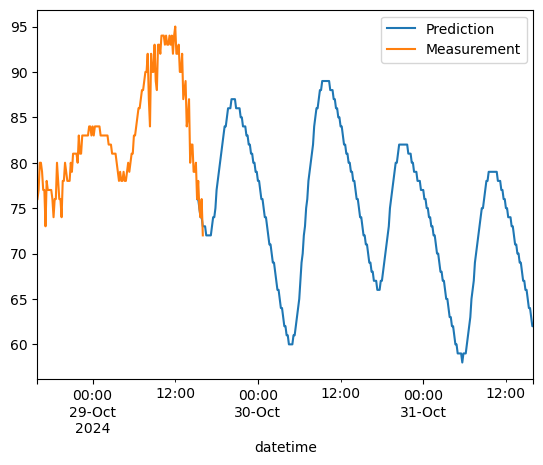

In [25]:
fig, ax = plt.subplots()
df_plot_measurements.plot(color="C0", ax=ax)
df_plot_forecast.plot(color="C1", ax=ax)
ax.legend(["Prediction", "Measurement"])